## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Country-data.csv")

In [3]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
about=pd.read_csv("data-dictionary.csv")

In [5]:
about

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")

In [7]:
profile

In [8]:
data.shape

(167, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [11]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
Data=data.drop("country",axis=1)

Target looks like regression


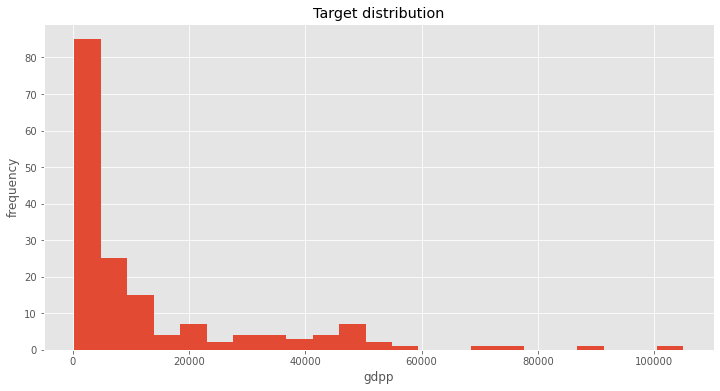

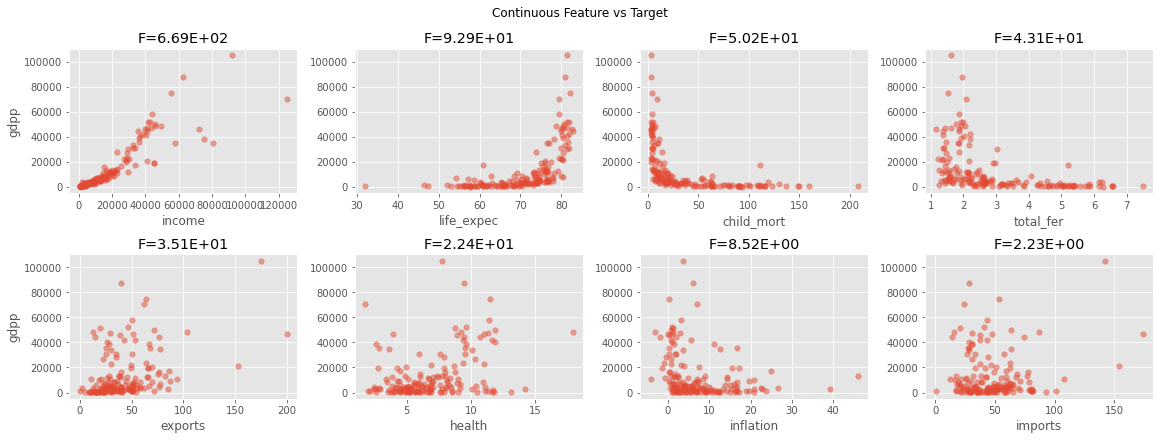

In [13]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
dabl.plot(Data, target_col = 'gdpp')

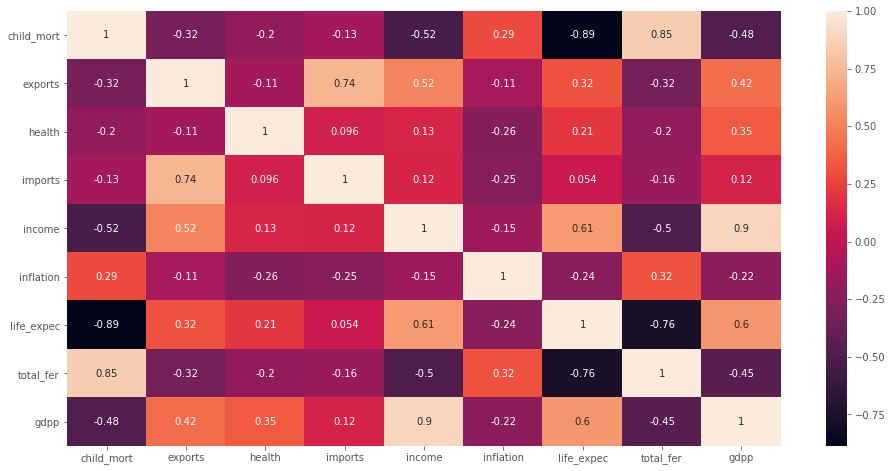

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(Data.corr(),annot=True)
plt.show()

# Outliers detection and Removal

In [15]:
Q1=Data.quantile(0.25)
Q3=Data.quantile(0.74)
IQR=Q3-Q1
print(IQR)

child_mort       50.1500
exports          27.3200
health            3.5656
imports          27.8040
income        18865.0000
inflation         8.2740
life_expec       11.4000
total_fer         2.0162
gdpp          12106.0000
dtype: float64


In [16]:
((Data<(Q1-1.5*IQR))|(Data>(Q3+1.5*IQR))).sum()

child_mort     5
exports        5
health         2
imports        5
income         8
inflation      7
life_expec     3
total_fer      1
gdpp          25
dtype: int64

In [17]:
Data=Data[-((Data<(Q1-1.5*IQR))|(Data>(Q3+1.5*IQR))).any(axis=1)]

In [18]:
Data.shape

(125, 9)

## Scaling the data using standardization

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(Data)

## PCA

In [20]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(data_scaled)
print('Total no. of principal components =',pc.n_components_)

Total no. of principal components = 9


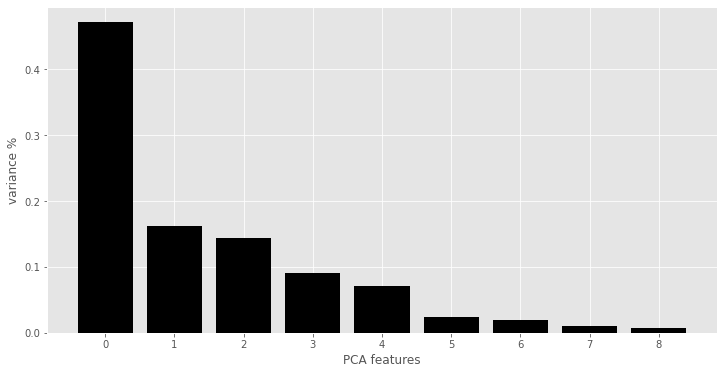

In [22]:

# Plot the explained variances
features = range(pc.n_components_)
plt.bar(features, pc.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(pc.components_)

Text(0, 0.5, 'PCA 2')

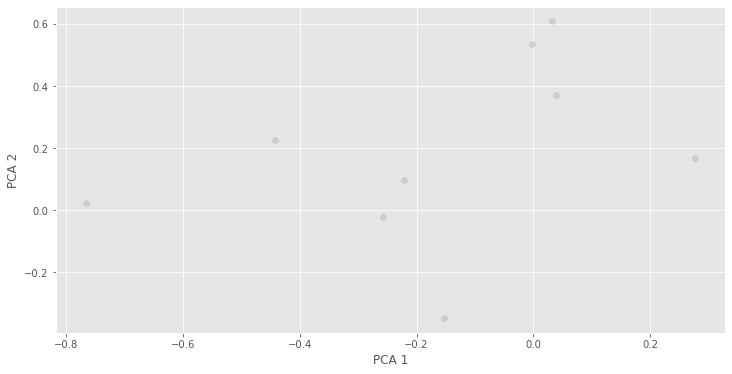

In [23]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [24]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[47.12 63.34 77.78 86.79 93.91 96.35 98.23 99.29 99.99]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

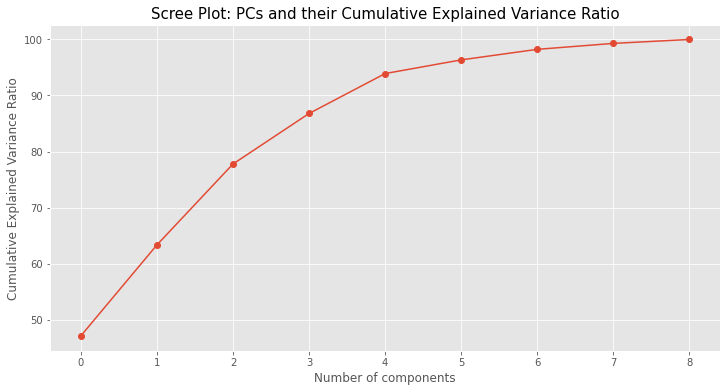

In [25]:
# Scree Plot
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

## K-Means

In [107]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 5 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init=5 )
    clusters.fit( data_scaled )
    cluster_errors.append( clusters.inertia_ )
optimal_clusters = np.argmin(cluster_errors)+2

In [108]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

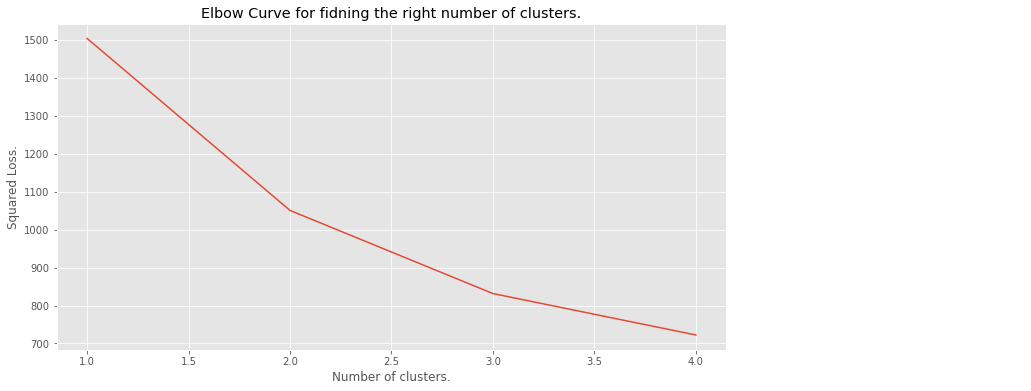

The optimal number of clusters obtained is -  5
The loss for optimal cluster is -  722.4124828630635


In [109]:
plt.plot(cluster_range, cluster_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(cluster_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(cluster_errors))

In [110]:
model = KMeans(n_clusters =optimal_clusters ,n_jobs=-1)
model.fit(data_scaled)

KMeans(n_clusters=5, n_jobs=-1)

In [111]:
Data['cluster_label']=model.labels_
Data.head(5)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  cluster_label  
0       5.82    553              1  
1       1.65   4090              0  
2       2.89   4460              0  
3       6.16   3530              1  
4       2.13  12200              0

In [112]:
label=Data.groupby(['cluster_label'])["gdpp"].count()
label

cluster_label
0    87
1    46
2    30
3     3
4     1
Name: gdpp, dtype: int64

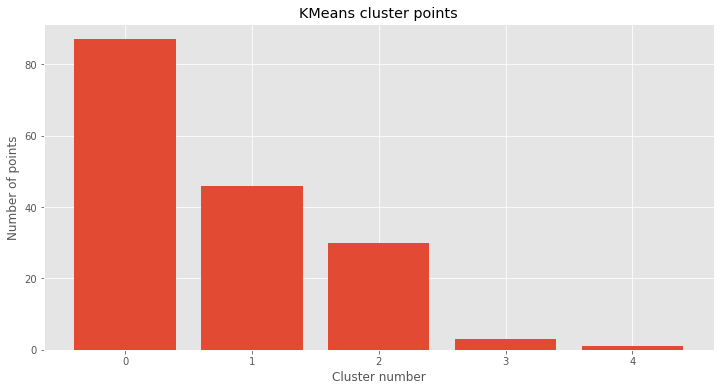

In [113]:
plt.bar([x for x in range(optimal_clusters)],label)
plt.xticks(list(range(0,5)))
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [114]:
from sklearn import metrics
metrics.silhouette_score(data_scaled, model.labels_)

0.30503789689711197

In [115]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
davies_bouldin_score(data_scaled,model.labels_)

0.8612326639850931

In [116]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

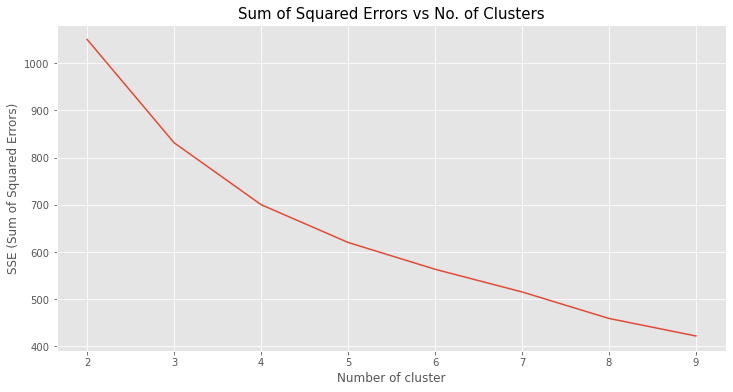

In [117]:
#Plotting SSE
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

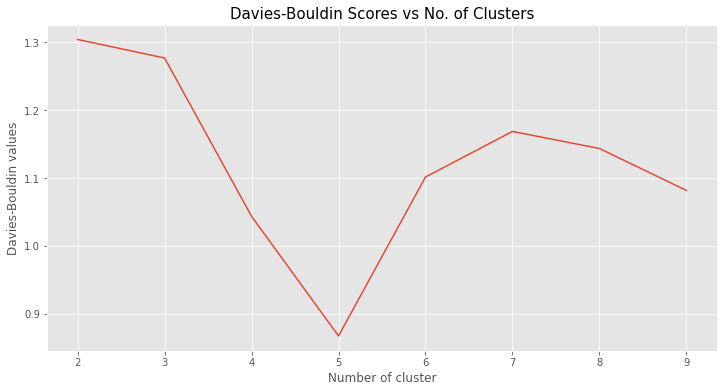

In [118]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

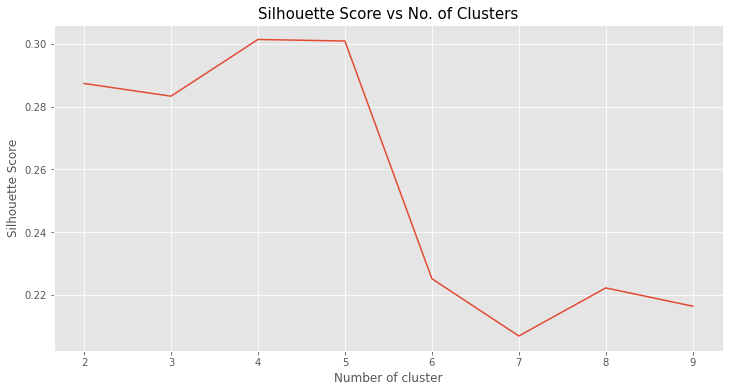

In [119]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2873566892140671
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.301375962376881
For n_clusters = 5 The average silhouette_score is : 0.30088229124112015
For n_clusters = 6 The average silhouette_score is : 0.22514525980338546
For n_clusters = 7 The average silhouette_score is : 0.20688602024745156
For n_clusters = 8 The average silhouette_score is : 0.22219890556988897
For n_clusters = 9 The average silhouette_score is : 0.21638564099423846


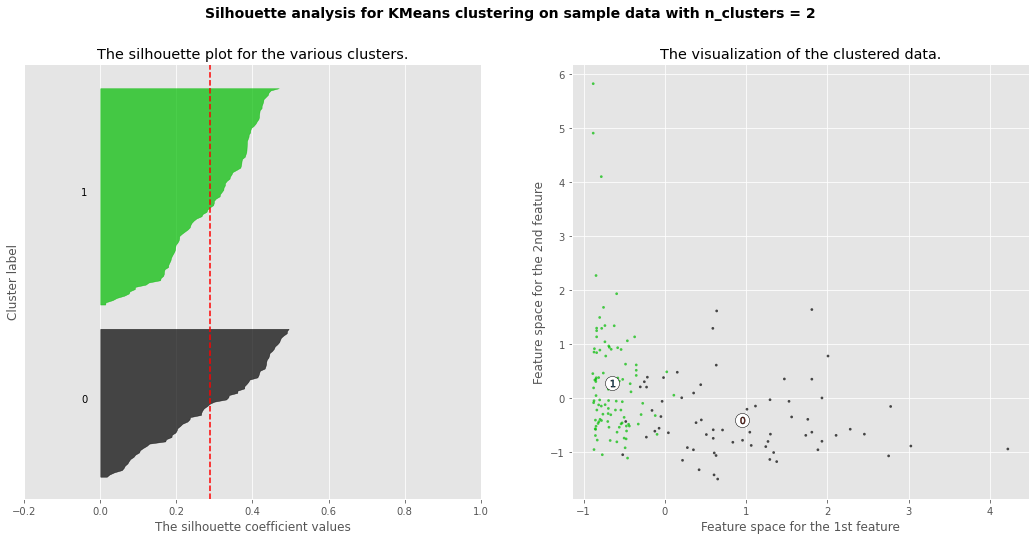

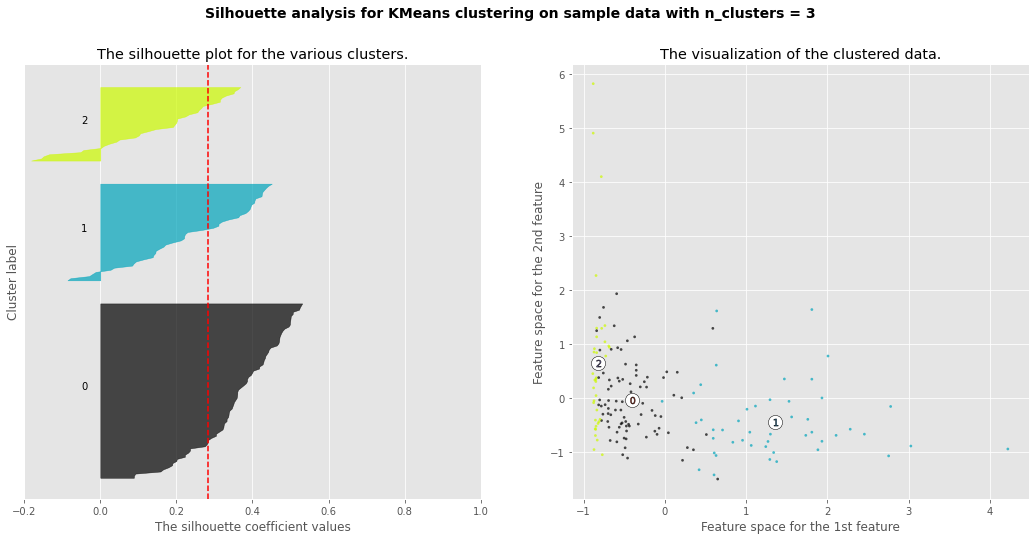

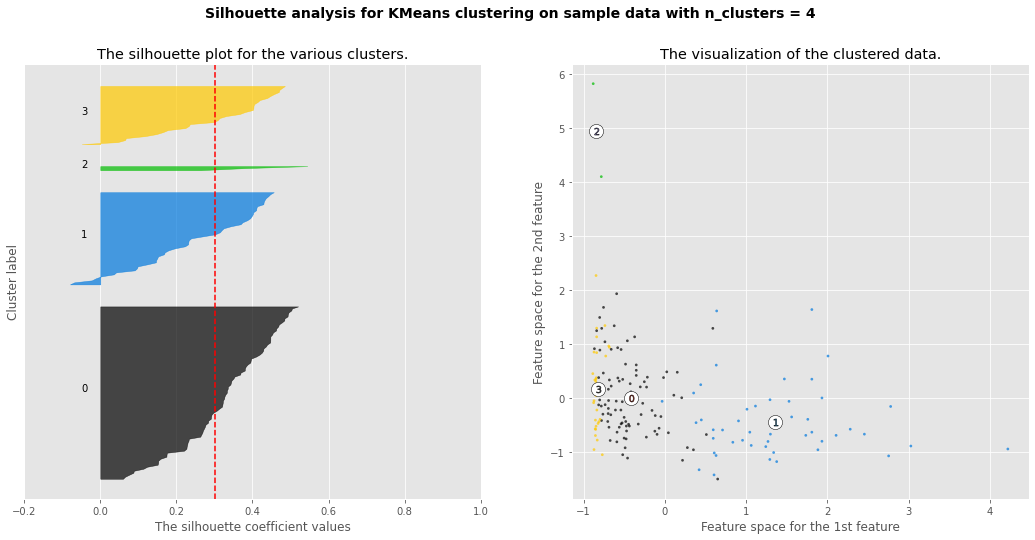

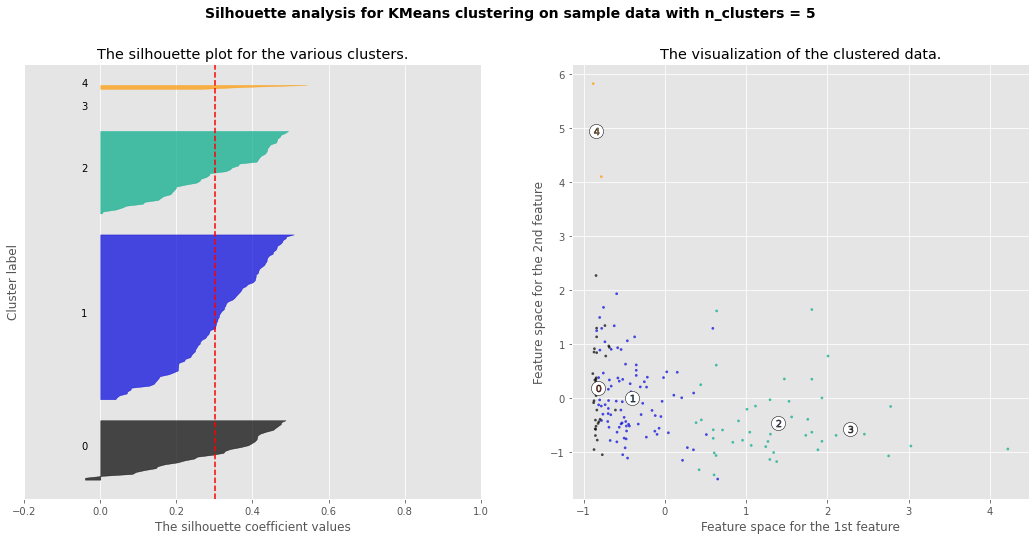

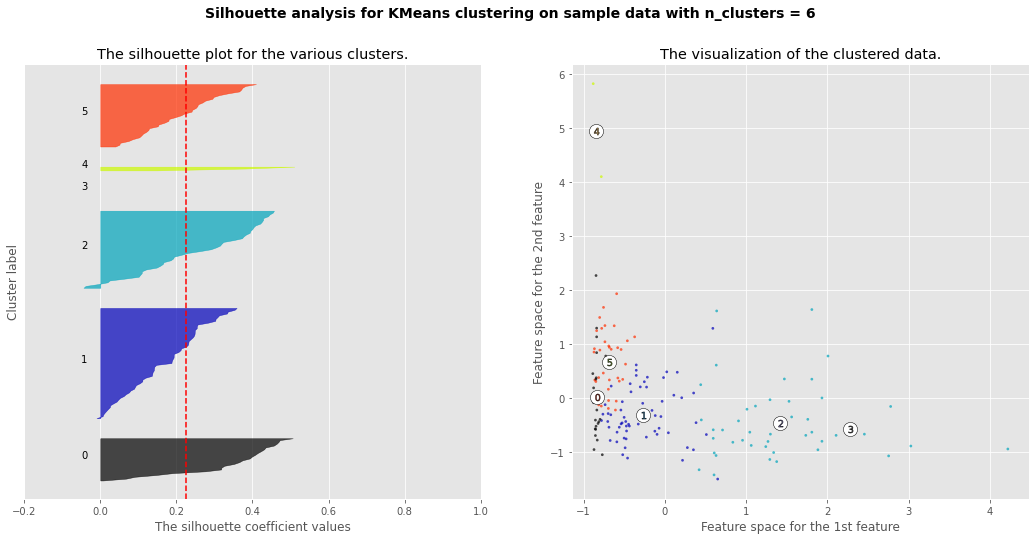

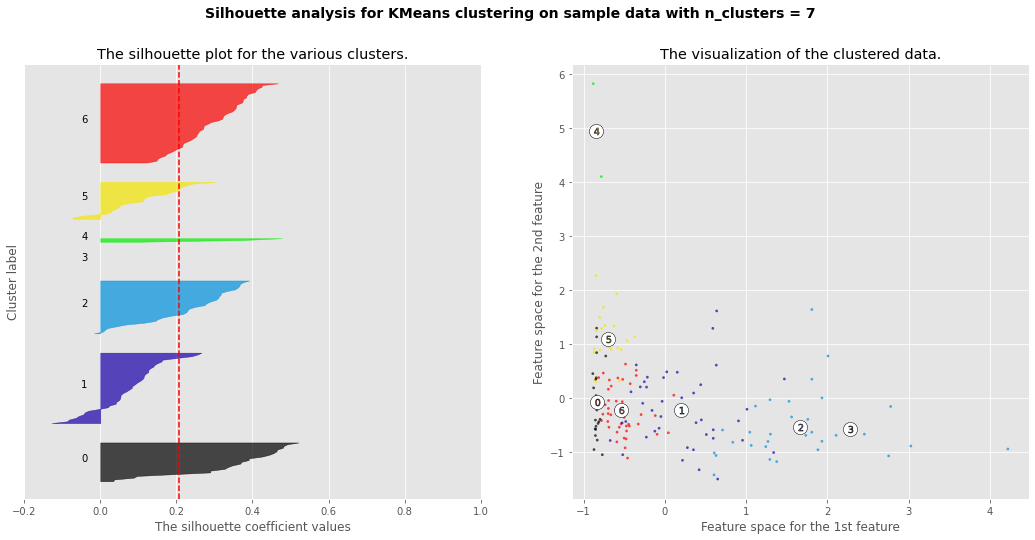

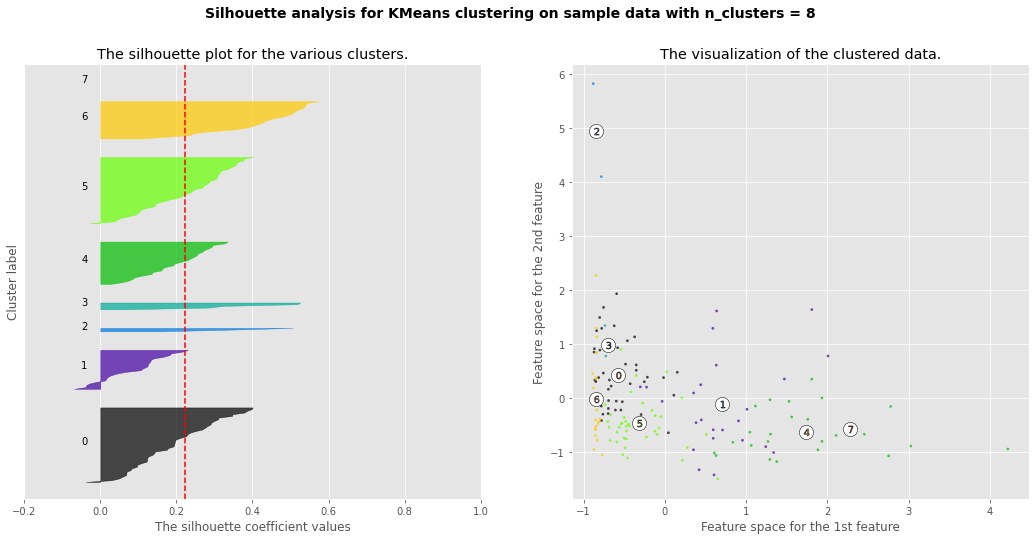

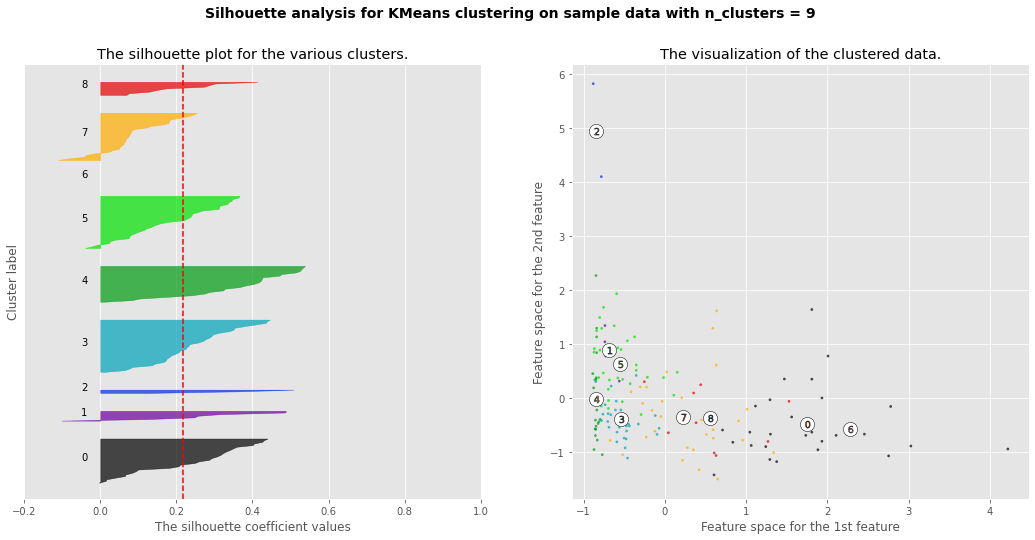

In [120]:
#Silhouette Plots for Different No. of Clusters
import matplotlib.cm as cm
import numpy as np
for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=12345)
    cluster_labels = clusterer.fit_predict(data_scaled)
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

In [121]:
cluster_labels = model.fit_predict(data_scaled)

In [122]:
preds = model.labels_
data_df = pd.DataFrame(Data)
data_df['KM_Clusters'] = preds
data_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  cluster_label  KM_Clusters  
0       5.82    553              1            0  
1       1.65   4090              0            4  
2       2.89   4460              0            4  
3       6.16   3530              1            0  
4       2.13  12200              0            4  
5       2.37  10300              0            4  
6       1.69   3220              0            4  
7       1.93  51900              2            2  
8       1.44  46900              2            2  
9       1.92   5840              0            4

## Hierarchical Clustering

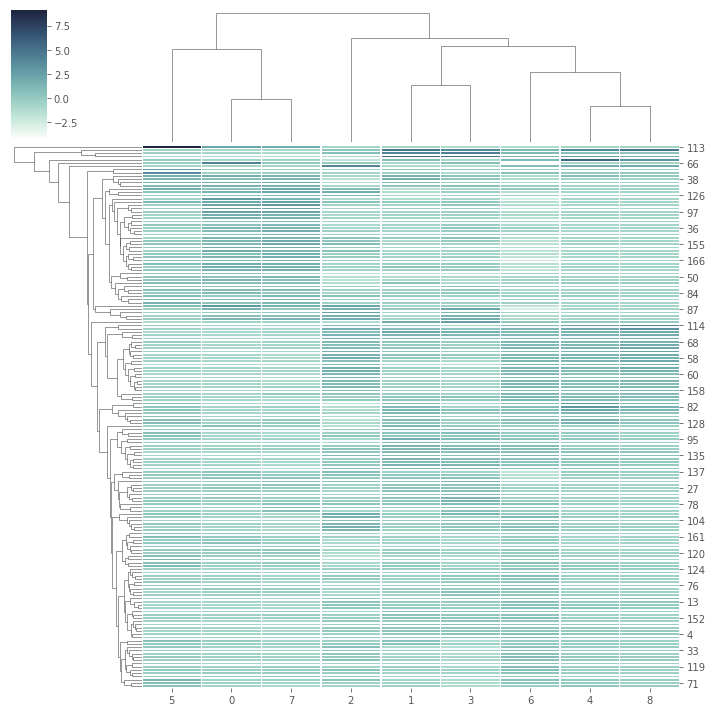

In [123]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(data_scaled, cmap=cmap, linewidths=.5)

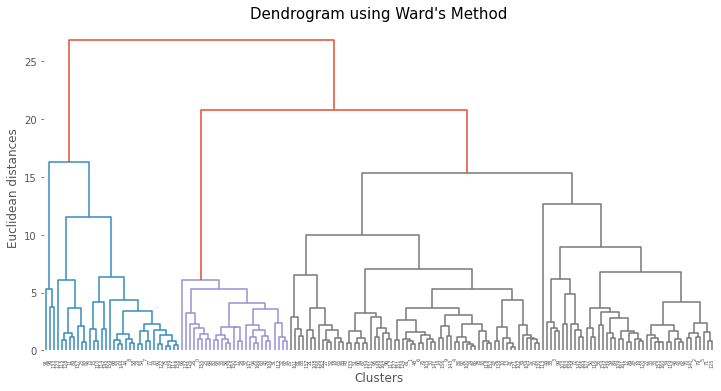

In [124]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

## AgglomerativeClustering

In [125]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(data_scaled)

In [127]:
hcpreds = hc.labels_
data_hc_df = Data.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  cluster_label  Hier_Clusters  
0       5.82    553              1              2  
1       1.65   4090              0              1  
2       2.89   4460              0              1  
3       6.16   3530              1              1  
4       2.13  12200              0              1  
5       2.37  10300              0              1  
6       1.69   3220              0              1  
7       1.93  51900              2              0  
8       1.44  46900              2              0  
9       1.92   5840              0              1

In [128]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = Data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].head())

# number of labels
print("number of labels: ", set(labels))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
number of labels:  {0, 1, 2, 3, 4, 5, -1}


# Thank You